In [1]:
# Depedencies
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
big_df = pd.read_csv("Resources/bigdf_clean.csv")
big_df

,Unnamed: 0,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo(BPM),valence,year
0,0,0.9950,0.708,158648,0.1950,0.563000,0.1510,-12.428,0,0.0506,118.469,0.7790,1928
1,1,0.9940,0.379,282133,0.0135,0.901000,0.0763,-28.454,0,0.0462,83.972,0.0767,1928
2,2,0.6040,0.749,104300,0.2200,0.000000,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,3,0.9950,0.781,180760,0.1300,0.887000,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,4,0.9900,0.210,687733,0.2040,0.908000,0.0980,-16.829,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,169904,0.1730,0.875,163800,0.4430,0.000032,0.0891,-7.461,75,0.1430,100.012,0.3060,2020
169905,169905,0.0167,0.719,167468,0.3850,0.031300,0.1110,-10.907,64,0.0403,128.000,0.2700,2020
169906,169906,0.5380,0.514,180700,0.5390,0.002330,0.1080,-9.332,70,0.1050,123.700,0.1530,2020
169907,169907,0.0714,0.646,167308,0.7610,0.000000,0.2220,-2.557,70,0.0385,129.916,0.4720,2020


In [3]:
big_df = big_df.loc[:, ['acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo(BPM)','valence','year','popularity']]
big_df

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo(BPM),valence,year,popularity
0,0.9950,0.708,158648,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1928,0
1,0.9940,0.379,282133,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1928,0
2,0.6040,0.749,104300,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,1928,0
3,0.9950,0.781,180760,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,1928,0
4,0.9900,0.210,687733,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1928,1
...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,2020,75
169905,0.0167,0.719,167468,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,2020,64
169906,0.5380,0.514,180700,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,2020,70
169907,0.0714,0.646,167308,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,2020,70


In [4]:
# Scale Data
X = big_df[['acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo(BPM)','valence','year']]
y = big_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

# Lasso Regression

In [7]:
# LASSO regression
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.7753774424952822

In [8]:
from sklearn.feature_selection import SelectFromModel

In [9]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso())

In [10]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\artsy\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [11]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.779144345931983

[-0.00000000e+00  0.00000000e+00 -2.26729727e-07  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.32583712e-01 -0.00000000e+00
  4.57384638e-03  0.00000000e+00  7.26042405e-01]
Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo(BPM)',
       'valence', 'year'],
      dtype='object')


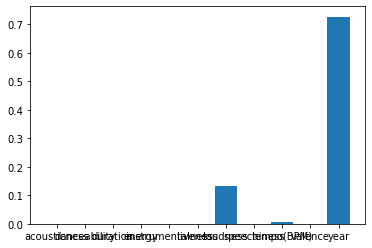

In [18]:
reg = Lasso(max_iter=10000).fit(X_train, y_train)
print(reg.coef_)
print(X.columns)
plt.bar(X.columns, reg.coef_)
plt.show()

# Ridge Regression

[-1.31163183 -0.78907446 17.95753058]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

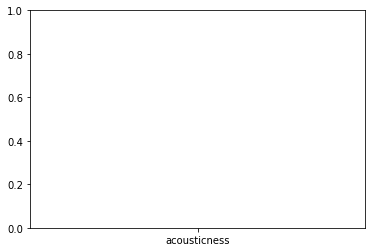

In [14]:
rreg = Ridge(alpha=100).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rreg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Ridge(alpha=100))

C:\Users\artsy\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [16]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.779144345931983

# ElasticNet Regression

[-1.31163183 -0.78907446 17.95753058]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

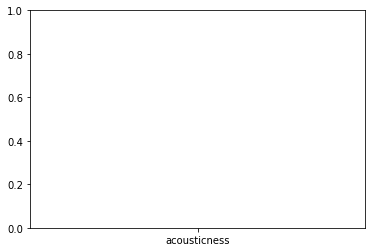

In [18]:
from sklearn.linear_model import ElasticNet
ereg = ElasticNet(alpha=10).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(ereg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=ElasticNet(alpha=10))

In [20]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\artsy\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [21]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.7787324350480553

# Without Year

In [5]:
# Scale Data
X = big_df[['acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo(BPM)','valence']]
y = big_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [5]:
# LASSO regression
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso())

In [6]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\artsy\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [7]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.4572889360155482

## Random Forest

In [6]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9909284240098564
Testing Score: 0.19617213616460286


[0.10001175 0.08424331 0.08795042 0.08760847 0.06756188 0.08451926
 0.08897326 0.08825633 0.08526698 0.08395092 0.14165741]


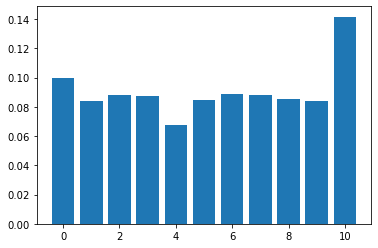

In [7]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

## KNN

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 0.991/0.150
k: 3, Train/Test Score: 0.440/0.176
k: 5, Train/Test Score: 0.349/0.176


In [12]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

C:\Users\artsy\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=17 Test Acc: 0.170


## SVC

In [ ]:
# Fit to the training data, and validate with the testing data
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [ ]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [ ]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))